<a href="https://colab.research.google.com/github/Shankesh05/mlda/blob/main/face_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded:
Total samples: 1348
Each image size: (62, 47)
PCA completed. Reduced features from 2914 to 100

Classification Report:
                    precision    recall  f1-score   support

     Ariel Sharon       1.00      0.73      0.85        15
     Colin Powell       0.72      0.94      0.82        68
  Donald Rumsfeld       0.72      0.74      0.73        31
    George W Bush       0.92      0.87      0.89       126
Gerhard Schroeder       0.89      0.70      0.78        23
      Hugo Chavez       1.00      0.75      0.86        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.88      0.88      0.88        42

         accuracy                           0.85       337
        macro avg       0.89      0.82      0.84       337
     weighted avg       0.86      0.85      0.85       337

Accuracy: 84.87%


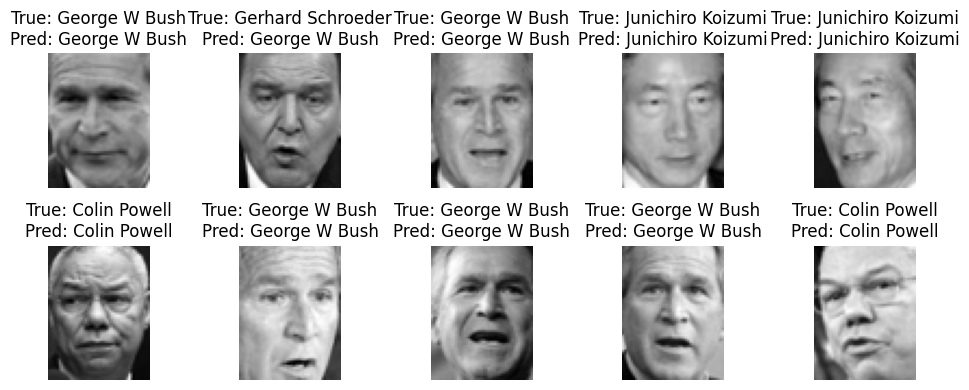

In [1]:
# Face Recognition using PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load dataset
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target
target_names = faces.target_names
n_samples, h, w = faces.images.shape

print("Dataset loaded:")
print("Total samples:", n_samples)
print("Each image size:", (h, w))

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Apply PCA for dimensionality reduction
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA completed. Reduced features from", X.shape[1], "to", n_components)

# Step 4: Train classifier (SVM)
clf = SVC(kernel='rbf', class_weight='balanced', gamma='scale')
clf.fit(X_train_pca, y_train)

# Step 5: Predict on test data
y_pred = clf.predict(X_test_pca)

# Step 6: Evaluate
acc = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Accuracy: {:.2f}%".format(acc * 100))

# Step 7: Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(h, w), cmap='gray')
    ax.set_title(f"True: {target_names[y_test[i]]}\nPred: {target_names[y_pred[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
